In [3]:
import gluonbook as gb
from mxnet import image, gluon

In [5]:
root_url = ('https://apache-mxnet.s3-accelerate.amazonaws.com/'
            'gluon/dataset/pikachu/')
data_dir = '../data/pikachu/'
dataset = {'train.rec': 'e6bcb6ffba1ac04ff8a9b1115e650af56ee969c8',
          'train.idx': 'dcf7318b2602c06428b9988470c731621716c393',
          'val.rec': 'd6c33f799b4d058e82f2cb5bd9a976f69d72d520'}
for k, v in dataset.items():
    gluon.utils.download(root_url+k, data_dir+k, sha1_hash=v)

In [6]:
edge_size = 256 # 输出图片的宽和高。
batch_size = 32

train_data = image.ImageDetIter(
    path_imgrec=data_dir+'train.rec',
    path_imgidx=data_dir+'train.idx',  # 每张图片在rec中的位置，使用随机顺序时需要。
    batch_size=batch_size,
    data_shape=(3, edge_size, edge_size), # 输出图片形状。
    shuffle=True,  # 用随机顺序访问。
    rand_crop=1,  # 一定使用随机剪裁。
    min_object_covered=0.95,  # 剪裁出的图片至少覆盖每个物体95%的区域。
    max_attempts=200) # 最多尝试 200 次随机剪裁。如果失败则不进行剪裁。

val_data = image.ImageDetIter(  # 测试图片则去除了随机访问和随机剪裁。
    path_imgrec=data_dir+'val.rec',
    batch_size=batch_size,
    data_shape=(3, edge_size, edge_size),
    shuffle=False)

In [7]:
batch = train_data.next()
(batch.data[0].shape, batch.label[0].shape)

((32, 3, 256, 256), (32, 1, 5))

In [8]:
def show_bboxes(axes, bboxs, labels=None, colors=['b','g','r','m','k']):
    for i, bbox in enumerate(bboxs):
        color = colors[i%len(colors)]
        rect = gb.bbox_to_rect(bbox.asnumpy(), color)
        axes.add_patch(rect)
        if labels and len(labels) > i:
            axes.text(rect.xy[0], rect.xy[1], labels[i],
                      va="center", ha="center", fontsize=9, color='white',
                      bbox=dict(facecolor=color, lw=0))

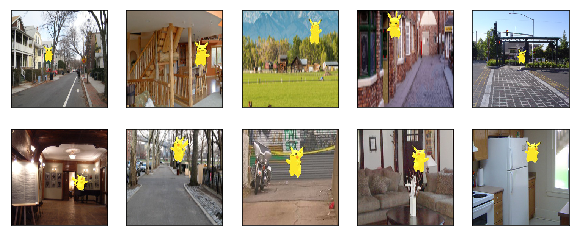

TypeError: zip argument #1 must support iteration

In [12]:
imgs = (batch.data[0][0:10].transpose((0,2,3,1)) ).clip(0, 254)/254
axes = gb.show_images(imgs, 2, 5).flatten()
for ax, label in zip(axes, batch.label[0][0:10]):
    show_bboxes(ax, [label[0][1:5]*edge_size], colors=['w'])